In [10]:
import pandas as pd

In [11]:
df0=pd.read_csv('data_a.csv')


In [12]:
def map_rent_or_sell(value):
    return 'rent' if value else 'sell'

step1: build useful index and columns

In [13]:
df0['rent or sell']=df0['To rent'].map(map_rent_or_sell)

In [14]:
df0.set_index(['rent or sell','Id'])

To rent To sell     Price  Number of rooms  Living Area  \
rent or sell Id                                                                 
rent         1610665     True   False     485.0              1.0         40.0   
             2718948     True   False     790.0              2.0        140.0   
             3229637     True   False     900.0              3.0        103.0   
             3860205     True   False     520.0              2.0         50.0   
             4141598     True   False     760.0              1.0         55.0   
...                       ...     ...       ...              ...          ...   
sell         10316113   False    True  349000.0              4.0          NaN   
rent         10316130    True   False     590.0              1.0          NaN   
             10316135    True   False     595.0              1.0          NaN   
             10316134    True   False    1150.0              3.0        800.0   
             10316136    True   False    1590.0              3.0        100.0   

                      Fully equipped kitchen Furnished  Open fire  Terrace  \
rent or sell Id                                                              
rent         1610665                    True     False      False    False   
             2718948                    True     False      False    False   
             3229637                     NaN     False      False    False   
             3860205                    True     False      False    False   
             4141598                    True       NaN      False     True   
...                                      ...       ...        ...      ...   
sell         10316113                    NaN       NaN      False    False   
rent         10316130                   True       NaN      False    False   
             10316135                    NaN       NaN      False    False   
             10316134                   True     False      False     True   
             10316136                   True     False      False     True   

                       Area of the terrace  Garden  Area of the garden  \
rent or sell Id                                                          
rent         1610665                   0.0   False                 0.0   
             2718948                   0.0   False                 0.0   
             3229637                   0.0    True               330.0   
             3860205                   0.0   False                 0.0   
             4141598                  30.0    True             10000.0   
...                                    ...     ...                 ...   
sell         10316113                  0.0    True                 1.0   
rent         10316130                  0.0   False                 0.0   
             10316135                  0.0   False                 0.0   
             10316134                  1.0    True                 1.0   
             10316136                 28.0   False                 0.0   

                       Surface of the land  Surface area of the plot of land  \
rent or sell Id                                                                
rent         1610665                   NaN                               NaN   
             2718948                   NaN                               NaN   
             3229637                 400.0                             400.0   
             3860205                   NaN                               NaN   
             4141598                   NaN                               NaN   
...                                    ...                               ...   
sell         10316113                  NaN                               NaN   
rent         10316130                  NaN                               NaN   
             10316135                  NaN                               NaN   
             10316134                  NaN                               NaN   
             10316136         

In [18]:
df0.isnull().sum()

Area of the garden                   8579
Area of the terrace                 16786
Fully equipped kitchen              30252
Furnished                           27135
Garden                                  0
Id                                      0
Living Area                         15887
Number of facades                   24991
Number of rooms                      4915
Open fire                               0
Price                                3992
State of the building               25132
Surface area of the plot of land    43849
Surface of the land                 43849
Swimming pool                           0
Terrace                                 0
To rent                              3992
To sell                              3992
rent or sell                            0
type                                    1
zipcode                                 0
dtype: int64

In [37]:
def cleaning(df):
    for col in ['Area of the garden','Area of the terrace','Surface area of the plot of land','Surface of the land']:
        df0[col].fillna(value=0,inplace=True)
    sale_cols=['Living Area', 'Number of facades',
       'Number of rooms', 'Open fire', 'Price', 'State of the building',
       'Surface area of the plot of land', 'Surface of the land',
       'Terrace','type','zipcode']
    rent_cols=['Living Area', 'Number of facades',
       'Number of rooms', 'Open fire', 'Price', 'State of the building',
       'Terrace','type','zipcode']
    sale_df,rent_df=df0.copy()
    df0[]

    df0.dropna()
    

,Area of the garden,Area of the terrace,Fully equipped kitchen,Furnished,Garden,Id,Living Area,Number of facades,Number of rooms,Open fire,...,State of the building,Surface area of the plot of land,Surface of the land,Swimming pool,Terrace,To rent,To sell,rent or sell,type,zipcode
0,0.0,0.0,True,False,False,1610665,40.0,2.0,1.0,False,...,\r\nExcellentétat\r\n,0.0,0.0,False,False,True,False,rent,Studio,4020
1,0.0,0.0,True,False,False,2718948,140.0,2.0,2.0,False,...,\r\nBon\r\n,0.0,0.0,False,False,True,False,rent,Appartement,3200
3,0.0,0.0,True,False,False,3860205,50.0,2.0,2.0,False,...,\r\nBon\r\n,0.0,0.0,False,False,True,False,rent,Appartement,6900
6,0.0,0.0,True,False,False,5123126,95.0,2.0,2.0,False,...,\r\nExcellentétat\r\n,0.0,0.0,False,False,True,False,rent,Appartement,4920
7,0.0,0.0,True,False,False,5360484,100.0,3.0,2.0,False,...,\r\nFraîchementrénové\r\n,0.0,0.0,False,True,True,False,rent,Appartement,1853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78160,0.0,21.0,True,False,False,10316096,163.0,4.0,3.0,False,...,\r\nExcellentétat\r\n,0.0,0.0,False,True,True,False,rent,Duplex,4682
78170,0.0,10.0,True,False,False,10316111,155.0,3.0,3.0,False,...,\r\nExcellentétat\r\n,0.0,0.0,False,True,True,False,rent,Duplex,4500
78174,0.0,0.0,True,False,False,10315700,134.0,2.0,2.0,False,...,\r\nBon\r\n,0.0,0.0,False,False,False,True,sell,Appartement,2018
78190,1.0,1.0,True,False,True,10316134,800.0,4.0,3.0,False,...,\r\nFraîchementrénové\r\n,0.0,0.0,False,True,True,False,rent,Bungalow,4052


In [15]:
df0.sort_index(axis=1,inplace=True)

In [41]:
rentdf=df0[df0['To rent']==True]
selldf=df0[df0['To sell']==True]

In [80]:
selldf['type'].unique()

array(['Appartement', 'Appartementdeservice', 'Immeuble', 'Villa',
       'Maison', 'Immeublemixte', 'Penthouse', 'Château', 'Duplex',
       'Maisondecampagne', 'Bienexceptionnel', 'Rez-de-chaussée',
       'Studio', 'Logementétudiant', 'Loft', 'Ferme', 'Autresbiens',
       'Maisonbel-étage', 'Bungalow', 'Manoir', 'Maisondemaître',
       'Triplex', 'Chalet', 'Pavillon'], dtype=object)

In [79]:
selldf[['Living Area', 'Number of facades',
       'Number of rooms', 'Open fire', 'Price', 'State of the building',
       'Surface area of the plot of land', 'Surface of the land',
       'Terrace','type','zipcode']][(selldf['Price']<8000) & (selldf['Price']>6000)]

,Living Area,Number of facades,Number of rooms,Open fire,Price,State of the building,Surface area of the plot of land,Surface of the land,Terrace,type,zipcode
18942,625.0,4.0,4.0,False,6490.0,\r\nExcellentétat\r\n,0.0,0.0,True,Appartement,1160
21398,695.0,4.0,9.0,True,6400.0,\r\nBon\r\n,9085.0,9085.0,False,Villa,2650
22375,1053.0,4.0,8.0,False,6900.0,\r\nExcellentétat\r\n,107720.0,107720.0,True,Villa,2970
33989,1200.0,4.0,10.0,False,6250.0,\r\nExcellentétat\r\n,6400.0,6400.0,True,Villa,2950
41429,425.0,4.0,6.0,False,7850.0,\r\nExcellentétat\r\n,928.0,928.0,True,Villa,8300
60940,NaN,2.0,NaN,False,6750.0,NaN,0.0,0.0,False,Immeuble,9000
64722,721.0,4.0,5.0,False,6745.0,\r\nBon\r\n,1373.0,1373.0,True,Bienexceptionnel,8300
65477,192.0,2.0,3.0,False,6950.0,\r\nExcellentétat\r\n,0.0,0.0,True,Appartement,8300
67050,721.0,4.0,4.0,False,6745.0,\r\nExcellentétat\r\n,1302.0,1302.0,True,Villa,8300
71238,NaN,4.0,5.0,False,7200.0,\r\nExcellentétat\r\n,1670.0,1670.0,True,Villa,8300


<AxesSubplot: ylabel='Frequency'>

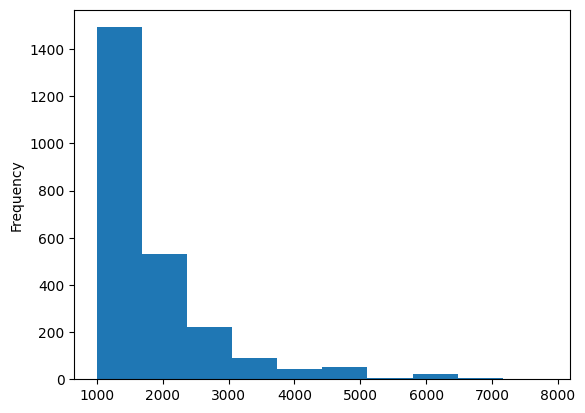

In [75]:
selldf['Price'][selldf['Price']<8000].plot.hist()

In [48]:
selldf['Price'].quantile([0,0.25,0.5,0.7,1])

0.00      1000.0
0.25    203500.0
0.50    295000.0
0.70    379000.0
1.00    999999.0
Name: Price, dtype: float64

<AxesSubplot: >

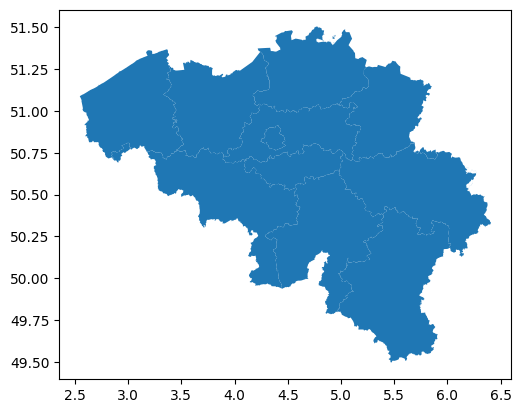

In [16]:

import geopandas as gpd

# Load the shapefile for Belgium's provinces
belgium = gpd.read_file('provinces-belges-2019.geojson')

# Plot the map
belgium.plot()